In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the data from the Excel file
file_path = "Question_3.xlsx"
df = pd.read_excel(file_path, sheet_name = "Q3")
df.head()

,Month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,CPM,clickthrough_rate,viewability,engagement_rate,video_completion_rate
0,Nov-2019,display,desktop,cpc,20,73.556544,58641,49,15468,6389,4,0,0,1.254354,0.000836,0.413046,0.081633,NaN
1,Nov-2019,display,desktop,cpc,75,227.396937,41074,168,7426,2679,13,0,0,5.536274,0.004090,0.360759,0.077381,NaN
2,Nov-2019,display,desktop,cpc,85,332.988521,303787,225,49079,26364,46,0,0,1.096125,0.000741,0.537175,0.204444,NaN
3,Nov-2019,display,desktop,cpc,86,55.406442,85832,45,6806,2568,1,0,0,0.645522,0.000524,0.377314,0.022222,NaN
4,Nov-2019,display,desktop,cpc,87,304.833211,239124,223,30268,13555,59,0,0,1.274791,0.000933,0.447833,0.264574,NaN


## 3a: Spend projections for the upcoming 12 months (please use the eMarketer reports to support any growth trend assumptions)

### 1. Analyze the Current Data

In [10]:
# Aggregate spend by month
monthly_spend = df.groupby('Month')['spend'].sum().reset_index()

# Format the 'spend' column to display values in a dollar format with commas
monthly_spend['spend'] = monthly_spend['spend'].apply(lambda x: f"${x:,.0f}")

# Convert month to date time to facilitate sorting and manipulation
monthly_spend['Month'] = pd.to_datetime(monthly_spend['Month'], format = '%b-%Y')
monthly_spend = monthly_spend.sort_values('Month')

# Print values
monthly_spend

,Month,spend
9,2019-11-01,"$1,032,744"
2,2019-12-01,"$1,147,448"
4,2020-01-01,"$666,780"
3,2020-02-01,"$878,788"
7,2020-03-01,"$899,896"
0,2020-04-01,"$651,304"
8,2020-05-01,"$788,748"
6,2020-06-01,"$1,161,175"
5,2020-07-01,"$1,244,084"
1,2020-08-01,"$1,397,477"


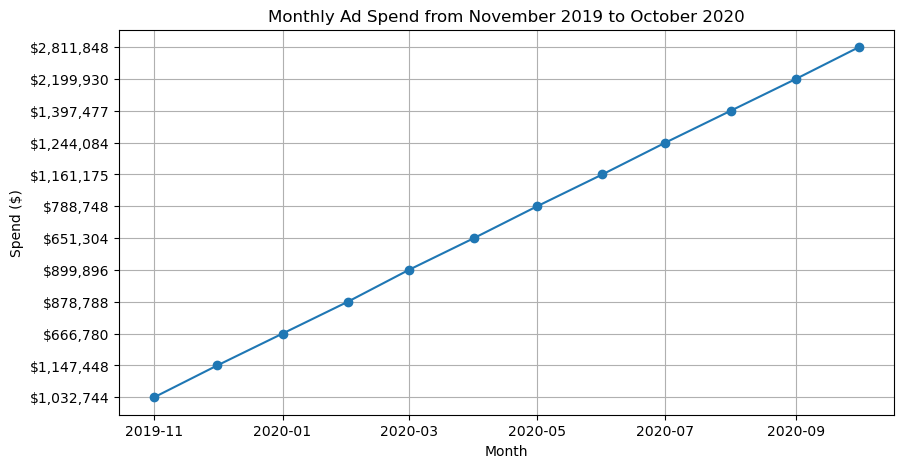

In [11]:
# Visualize the Monthly Spend Data
plt.figure(figsize=(10, 5))
plt.plot(monthly_spend['Month'], monthly_spend['spend'], marker='o')
plt.title('Monthly Ad Spend from November 2019 to October 2020')
plt.xlabel('Month')
plt.ylabel('Spend ($)')
plt.grid(True)
plt.show()

### 2. Apply eMarketer Growth Rates

Use the average growth rate calculated from eMarketer report to forecast future spends for 2020-10 to 2021-09

#### 2.1 Calculate Average Growth Rate

Based on the eMarketer insights for Digital ad spending:

In [14]:
# Define growth rates for 2020-2024
growth_rates = [7.5, 20.2, 15.1, 12.2, 9.8] # percentages

# Convert percentage to decimal for calculations
growth_rates = [rate / 100 for rate in growth_rates]

# Calculate average growth rate
average_growth_rate = np.mean(growth_rates)
print(f'Average Display ad spending Growth Rate: {average_growth_rate}')

Average Display ad spending Growth Rate: 0.1296


#### 2.2 Forecast Future Spends

Using the average growth rate to project spends for the next 12 months:

In [18]:
# Last known spend value
last_spend = monthly_spend['spend'].iloc[-1]

# Ensure 'last_spend' is a Numeric Value
last_spend = last_spend.replace(',', '').replace('$', '')
last_spend = float(last_spend)

print(last_spend)

2811848.0


In [21]:
# Project future spends
forecast_months = pd.date_range(start=monthly_spend['Month'].max() + pd.DateOffset(months=1), periods=12, freq='M')
forecasted_spends = [f"${last_spend * (1 + average_growth_rate) ** i:,.0f}" for i in range(1, 13)]


# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Month': forecast_months,
    'Forecasted Spend': forecasted_spends
})

# Display the forecast
forecast_df

,Month,Forecasted Spend
0,2020-11-30,"$3,176,264"
1,2020-12-31,"$3,587,907"
2,2021-01-31,"$4,052,900"
3,2021-02-28,"$4,578,156"
4,2021-03-31,"$5,171,485"
5,2021-04-30,"$5,841,709"
6,2021-05-31,"$6,598,795"
7,2021-06-30,"$7,453,999"
8,2021-07-31,"$8,420,037"
9,2021-08-31,"$9,511,274"


### 3. Plot the Forecast

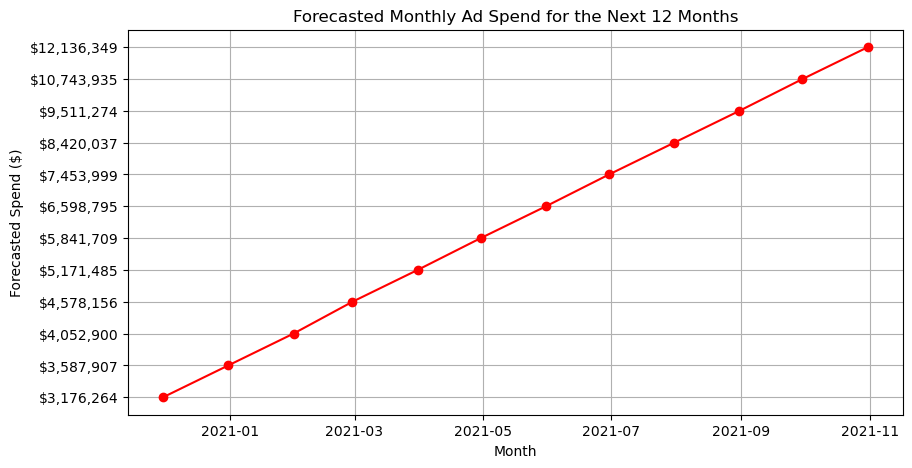

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_df['Month'], forecast_df['Forecasted Spend'], marker='o', color='red')
plt.title('Forecasted Monthly Ad Spend for the Next 12 Months')
plt.xlabel('Month')
plt.ylabel('Forecasted Spend ($)')
plt.grid(True)
plt.show()

### 4. Expand Analysis by Ad Format

In [23]:
# Convert 'Month' to datetime for better handling
df['Month'] = pd.to_datetime(df['Month'], format='%b-%Y')

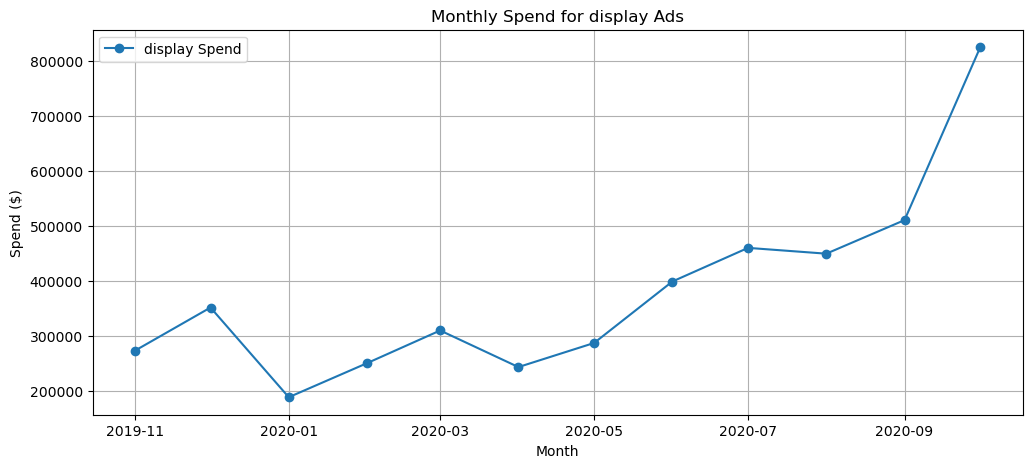

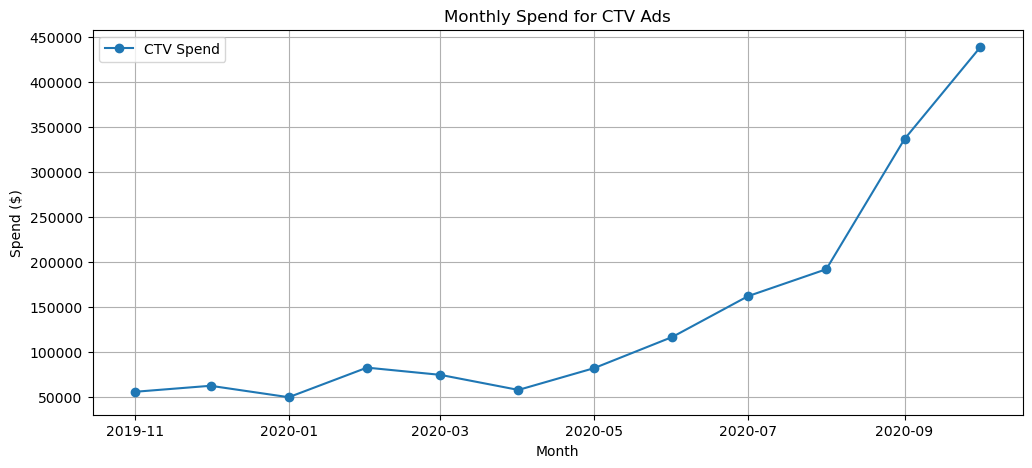

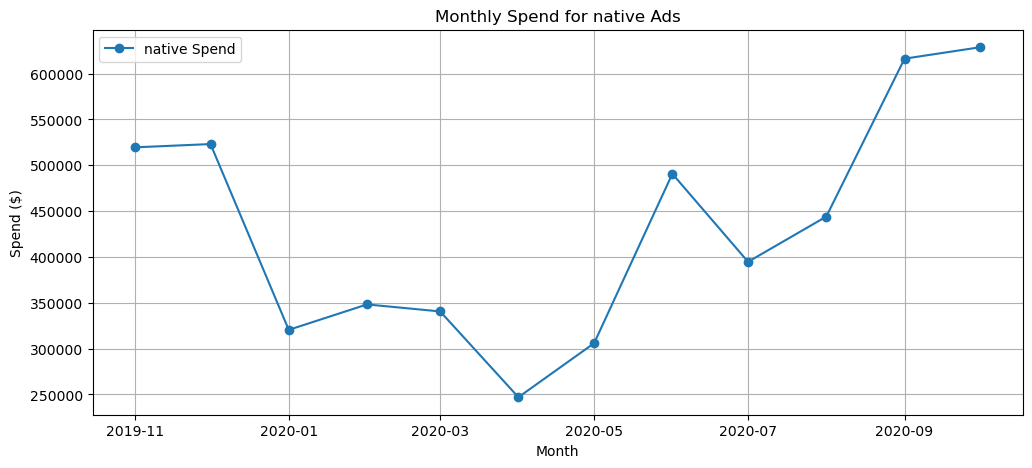

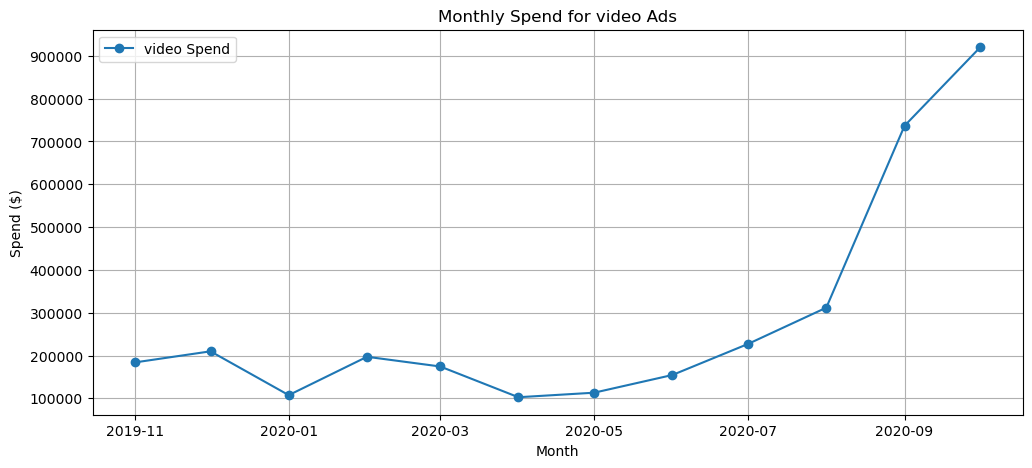

In [24]:
# List of unique ad formats
formats = df['format'].unique()

# Dictionary to hold dataframes for each format
format_df = {}

for format_type in formats:
    # Filter data for each format and aggregate monthly spend
    format_spend = df[df['format'] == format_type].groupby('Month')['spend'].sum().reset_index()
    
    # Store in dictionary
    format_df[format_type] = format_spend

    # Plotting the spend for each format
    plt.figure(figsize=(12, 5))
    plt.plot(format_spend['Month'], format_spend['spend'], marker='o', label=f'{format_type} Spend')
    plt.title(f'Monthly Spend for {format_type} Ads')
    plt.xlabel('Month')
    plt.ylabel('Spend ($)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [31]:
format_df

{'display':         Month          spend
 0  2019-11-01  273085.139450
 1  2019-12-01  351618.015628
 2  2020-01-01  188693.621353
 3  2020-02-01  250523.537220
 4  2020-03-01  309932.560635
 5  2020-04-01  243478.499760
 6  2020-05-01  287237.990310
 7  2020-06-01  398866.430115
 8  2020-07-01  459961.590690
 9  2020-08-01  449418.386370
 10 2020-09-01  510400.270635
 11 2020-10-01  824421.634065,
 'CTV':         Month          spend
 0  2019-11-01   56182.403664
 1  2019-12-01   62856.681337
 2  2020-01-01   50160.891105
 3  2020-02-01   83015.118444
 4  2020-03-01   75013.939995
 5  2020-04-01   58260.392445
 6  2020-05-01   82450.700055
 7  2020-06-01  117066.809040
 8  2020-07-01  162355.290015
 9  2020-08-01  192268.004520
 10 2020-09-01  336780.076875
 11 2020-10-01  438700.421205,
 'native':         Month          spend
 0  2019-11-01  519593.805423
 1  2019-12-01  523165.044194
 2  2020-01-01  320419.223436
 3  2020-02-01  348180.386917
 4  2020-03-01  340529.922300
 5  2020-0

### 4.1 Apply eMarketer Growth Rates for Each Ad Category:

       Month  Forecasted Spend
0 2020-11-30     903566.110935
1 2020-12-31     999199.020487
2 2021-01-31     957153.517149
3 2021-02-28     931596.446493
4 2021-03-31     910985.905642


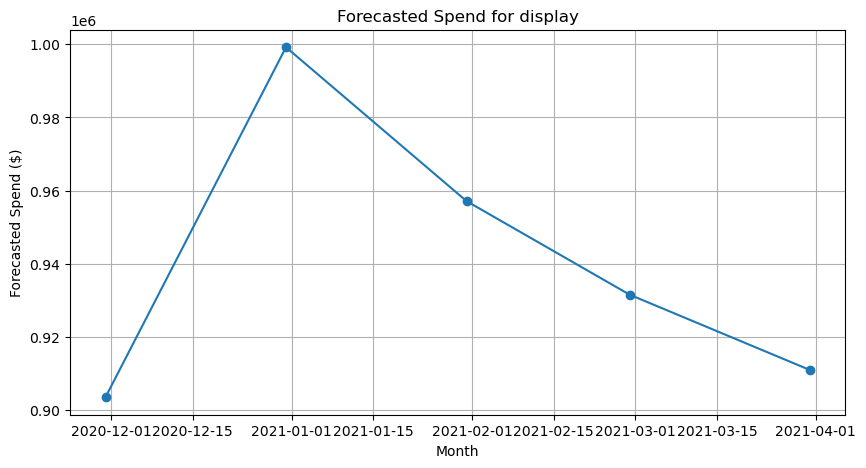

       Month  Forecasted Spend
0 2020-11-30     557588.235352
1 2020-12-31     614619.290108
2 2021-01-31     544865.923137
3 2021-02-28     508015.087755
4 2021-03-31     490905.771328


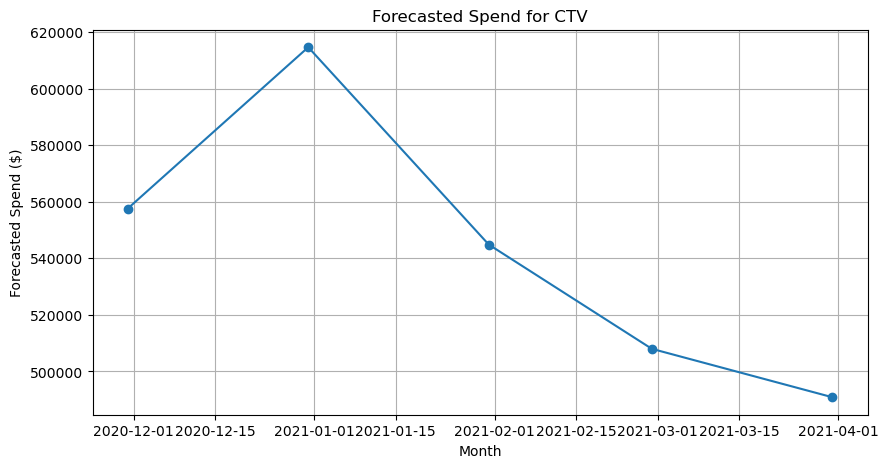

       Month  Forecasted Spend
0 2020-11-30     925034.039771
1 2020-12-31     896107.074558
2 2021-01-31     811212.720126
3 2021-02-28     659031.729219
4 2021-03-31     760904.954537


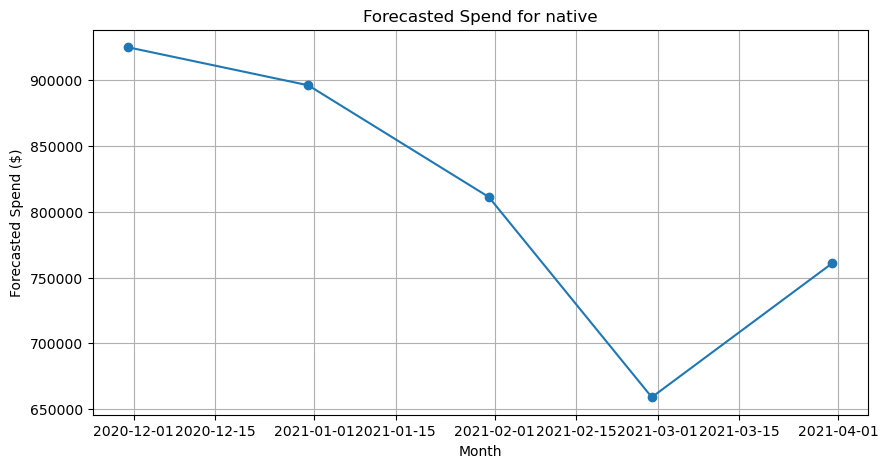

       Month  Forecasted Spend
0 2020-11-30      1.032104e+06
1 2020-12-31      1.156288e+06
2 2021-01-31      1.087297e+06
3 2021-02-28      1.065220e+06
4 2021-03-31      1.038543e+06


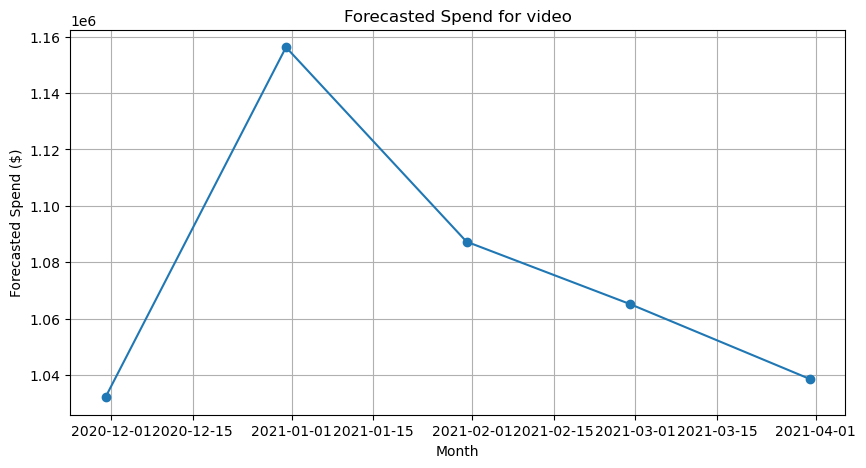

In [35]:
# Growth rates for each ad format
growth_rates = {
    'display': [9.6, 21.2, 16.1, 13.0, 10.5],
    'CTV': [27.1, 40.1, 24.2, 15.8, 11.9],
    'native': [47.1, 42.5, 29.0, 4.8, 21.0],
    'video': [12.2, 25.7, 18.2, 15.8, 12.9]    
}

# Create forecast dictionary to hold data
forecasts = {}

# Forecast for each format based on its specific growth rate
for format_type, spends in format_df.items():
    last_spend = spends['spend'].iloc[-1]
    forecasted_spends = [last_spend * (1 + rate / 100) for rate in growth_rates.get(format_type, [])]
    
    # Generate forecast dates
    forecast_months = pd.date_range(start=spends['Month'].max() + pd.DateOffset(months=1), periods=len(forecasted_spends), freq='M')
    
    # Create DataFrame for each forecast
    forecasts[format_type] = pd.DataFrame({
        'Month': forecast_months,
        'Forecasted Spend': forecasted_spends
    })
    
    # Print the forecast DataFrame to verify
    print(forecasts[format_type])
    
    plt.figure(figsize=(10, 5))
    plt.plot(forecasts[format_type]['Month'], forecasts[format_type]['Forecasted Spend'], marker='o')
    plt.title(f"Forecasted Spend for {format_type}")
    plt.xlabel('Month')
    plt.ylabel('Forecasted Spend ($)')
    plt.grid(True)
    plt.show()

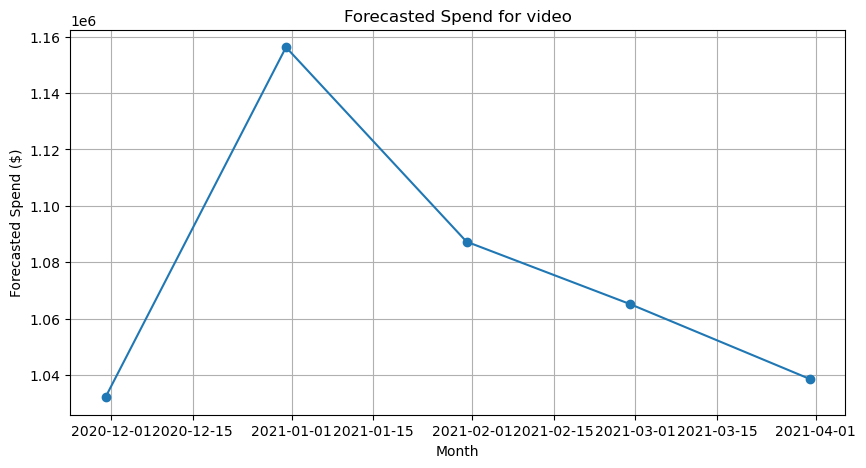

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(forecasts[format_type]['Month'], forecasts[format_type]['Forecasted Spend'], marker='o')
plt.title(f"Forecasted Spend for {format_type}")
plt.xlabel('Month')
plt.ylabel('Forecasted Spend ($)')
plt.grid(True)
plt.show()

## 3b: Market insights oriented around the spend data

- invovles analyzing the spend data in conjunction with key metrics such as impressions, clicks, click-through rates (CTR)
- metrics that helps us to understand the effectiveness and efficiency of the ad spend across different formats and campaigns

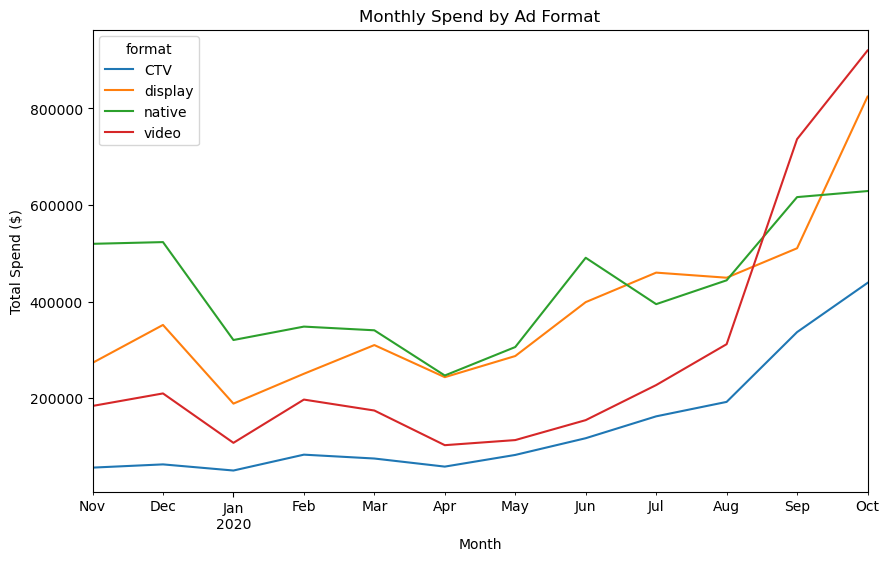

In [44]:
# Aggregate spend by month and ad format
monthly_spend = df.groupby(['Month', 'format'])['spend'].sum().unstack()

# Plot the data to visualize trends
monthly_spend.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Spend by Ad Format')
plt.xlabel('Month')
plt.ylabel('Total Spend ($)')
plt.show()

### 1. Analyze Key Performance Metrics
- assessing the key performance indicators (KPIs) associated with each ad format
- compute metrics like CTR

In [60]:
# Calculate CTR
df['CTR'] = (df['clickthrough_rate']) * 100

df['CTR']

0        0.083559
1        0.409018
2        0.074065
3        0.052428
4        0.093257
           ...   
10173    0.000000
10174    0.000000
10175    0.000000
10176    0.000000
10177    0.000000
Name: CTR, Length: 10178, dtype: float64

### 2. Analyze Spend Efficience
Examine how the ad spend relates to the number of impressions and clicks generated
- Spend per Impression: Analzye how much is spent for each impression, which can indicate how costly it is to get your ad seen
- Spend per Click: Understanding the cost per click can help gauge how cost-effective the strategy is in terms of engaging users

In [63]:
# Calculating Spend Efficiency
df['Spend per Impression'] = df['spend'] / df['impressions']
df['Spend per Click'] = df['spend'] / df['clicks']

### 3. Contextual and Comparative Analysis

#### 3.1 Analyze Temporal Trends
Identify any trends over time in ad spend, impressions, cluicks and CTR, which could reveal seasonal patterns, effects of speciic campaigns, or reactions to market changes

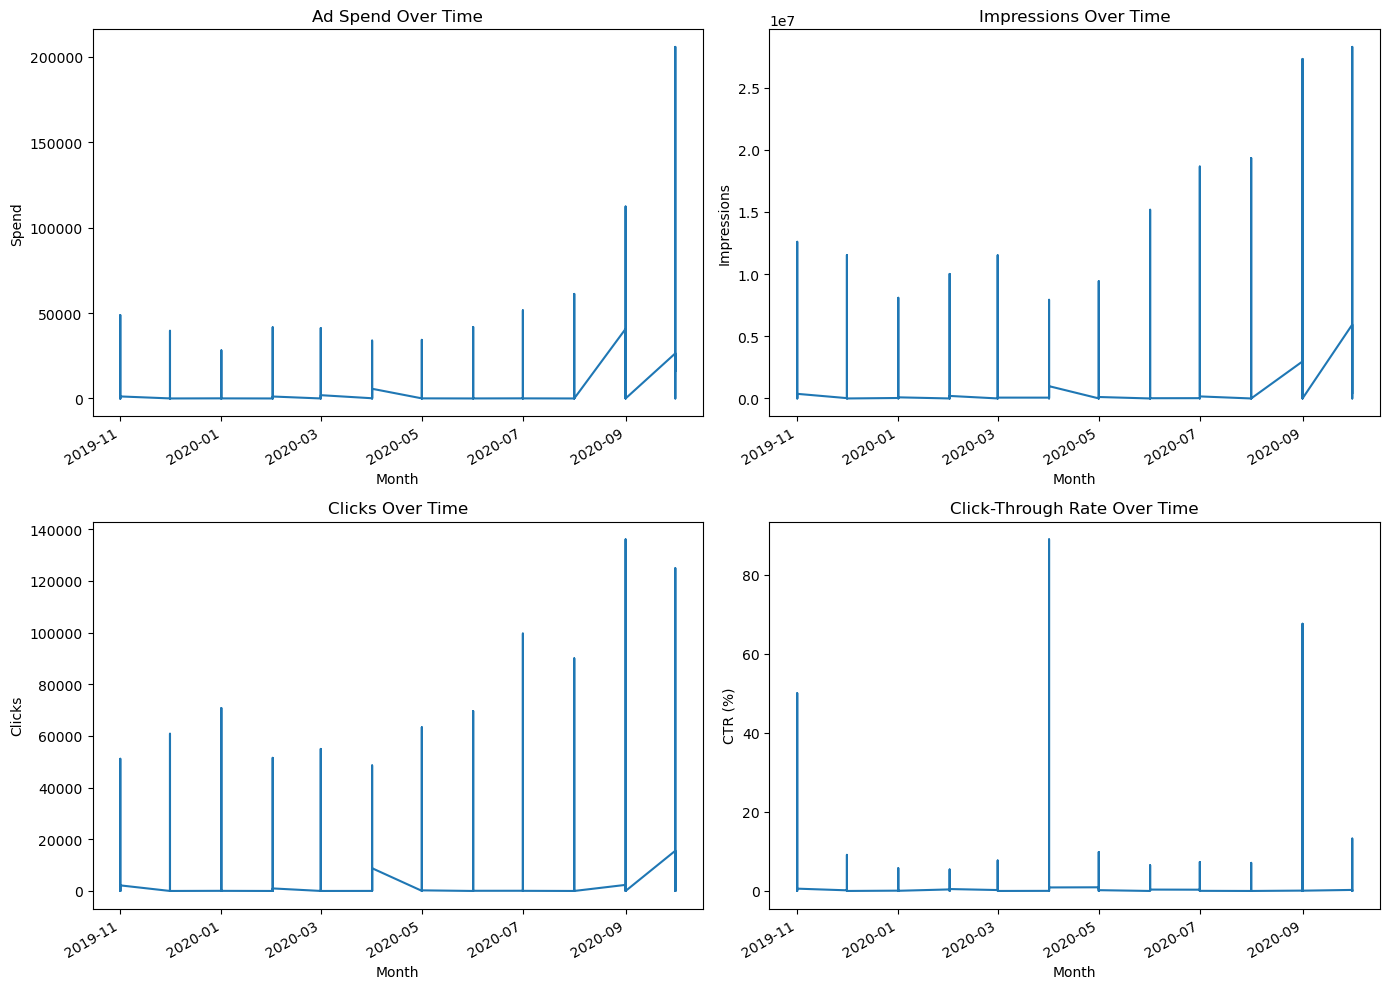

In [64]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plotting trends over time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
df['spend'].plot(ax=axes[0,0], title='Ad Spend Over Time')
axes[0,0].set_ylabel('Spend')

df['impressions'].plot(ax=axes[0,1], title='Impressions Over Time')
axes[0,1].set_ylabel('Impressions')

df['clicks'].plot(ax=axes[1,0], title='Clicks Over Time')
axes[1,0].set_ylabel('Clicks')

df['CTR'].plot(ax=axes[1,1], title='Click-Through Rate Over Time')
axes[1,1].set_ylabel('CTR (%)')

plt.tight_layout()
plt.show()

Analyzing the trends:
1. Ad Spend Over Time
Observation: Ad Spend shows a significant increase towards the end of the period, with notable spikes, particularly in the last two months.
Possible Causes: This could be attributed to a seasonal campaign, increased budget allocation due to end-of-year marketing strategies, or a response to market opportunities such as holiday sales or special events.
2. Impressions Over Time
Observation: Similar to Ad Spend, Impressions also spike significantly in the later months.
Possible Causes: The increase in ad spend typically correlates with an increase in impressions; hence, the observed spike in impressions is likely due to increased ad placements. This may also indicate improved ad visibility or expansion into new channels or platforms.
3. Clicks Over Time
Observation: Clicks also show an upward trend towards the end, but the spikes are less pronounced compared to Impressions and Spend.
Possible Causes: While the increase in clicks generally follows the trend in impressions, the relatively smaller increase could suggest that while more ads are being seen, the proportion of interactions (clicks) hasn't increased at the same rate. This might indicate ad fatigue or less effective targeting during high-volume periods.
4. Click-Through Rate Over Time
Observation: CTR shows significant variability, with some months showing very high rates and others quite low, despite the general increase in ad spend and impressions.
Possible Causes: The variability in CTR can be due to the nature of the campaigns (e.g., highly targeted vs. broad-reaching campaigns), the effectiveness of the ad creatives, or audience targeting strategies. High CTR peaks might coincide with highly optimized campaigns or promotions, while lower rates could indicate broader targeting or less engaging content.

Based on these observations, some strategi insights and recommendations: 
- Optimization Opportunities: Analyze periods with high spend but lower-than-expected CTR and Clicks to identify optimization opportunities. This could involve refining targeting strategies, improving ad creatives, or revising the ad placements.

- Seasonal Campaigns: Given the spikes in ad activity towards year-end, consider planning your budget to accommodate seasonal variations more effectively. Ensure that campaigns during these peak times are optimized for engagement, not just visibility.

- Ad Fatigue Management: Implement strategies to combat ad fatigue, especially during periods of high ad frequency. This could involve using a variety of ad creatives, rotating ads more frequently, and using audience segmentation to target ads more precisely.

- Evaluate ROI: With significant investment towards the period's end, evaluate the return on investment (ROI) comprehensively. This includes not just analyzing clicks and impressions but also deeper metrics like conversion rates (if available) or qualitative outcomes like brand recognition or customer feedback.

### 3.2 Conduct Comparative Analysis
Compare metrics across different ad formats or campaigns to identify which are more efficient or effective. Can help with reallocating resources to optimize overall ad performance 

In [69]:
grouped_data = df.groupby('format').agg({
    'spend': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'CTR': 'mean'  # Average CTR by format
})

grouped_data['Spend per Impression'] = grouped_data['spend'] / grouped_data['impressions']
grouped_data['Spend per Click'] = grouped_data['spend'] / grouped_data['clicks']

# Convert 'spend' to Dollar Format
grouped_data['spend'] = grouped_data['spend'].apply(lambda x: f"${x:,.2f}")

grouped_data

,spend,impressions,clicks,CTR,Spend per Impression,Spend per Click
format,,,,,,
CTV,"$1,715,110.73",51605012,0,0.000000,0.033235,inf
display,"$4,547,637.68",1401294298,2522870,0.177332,0.003245,1.802565
native,"$5,179,290.14",1858460399,5838444,0.370655,0.002787,0.887101
video,"$3,438,181.17",238149258,830842,0.576071,0.014437,4.138189


Analysis of Each Ad Format:
1. CTV (Connected TV)
- Spend: 1,715,110.73
- Impressions: 5,160,5012
- Clicks: 0 (resulting in CTR of 0.00% and infinite Spend per Click)
- Observations:
    - The zero clicks for CTV likely indicate that this format is more about brand awareness and visibility rather than direct interaction. The metrics suggest that CTV ads are not clickable or not meant to drive direct responses.
    - The high spend per impression indicates relatively expensive placement costs, typical for video content on televisions or streaming platforms.
2. Display
- Spend: 4,547,637.68
- Impressions: 140,129,298
- Clicks: 252,287
- CTR: 0.17732%
- Observations:
    - Display ads show a moderate level of engagement. The relatively low CTR is typical for display ads, which are abundant and often not highly targeted.
    - Spend per click indicates these are relatively economical, suitable for broad reach without necessarily high engagement expectations.
3. Native
- Spend: 5,179,290.14
- Impressions: 1,858,460,399
- Clicks: 583,844
- CTR: 0.37065%
- Observations:
    - Native ads perform better in terms of CTR, likely due to their seamless integration into the content, making them less intrusive and more engaging.
    - The lower spend per click compared to video ads suggests a better cost-effectiveness, balancing reach and engagement well.
4. Video
- Spend: 3,438,181.17
- Impressions: 238,149,258
- Clicks: 83,084
- CTR: 0.57607%
- Observations:
    - Video ads have the highest CTR among all formats, indicating their effectiveness in capturing audience attention.
    - However, the high spend per click reflects the cost of producing and distributing quality video content, making it expensive though potentially rewarding.

Strategic Insights and Recommendations
- CTV: Continue using CTV for brand campaigns focused on awareness, particularly during high-visibility events or in markets with high streaming consumption. Explore potential interactive elements if the platform allows to increase engagement.

- Display: Given the broad reach but low engagement, use display ads for top-of-the-funnel marketing objectives. Consider enhancing targeting and personalization to improve CTR and reduce the overall cost per click.

- Native: The good performance of native ads in terms of CTR and cost-efficiency makes them ideal for campaigns aimed at both engagement and conversion. Further invest in native advertising where content alignment can be achieved.

- Video: The high engagement rate justifies the expense for video ads. Focus video ad investments on campaigns where high engagement and impact are critical. Optimize targeting to ensure these costly ads reach the most likely converters.

## 4: Select 2-3 advertiser categories and generate insights on the metrics provided.

In [51]:
# Load the data from the Excel file
file_path = "Question_4.xlsx"
df2 = pd.read_excel(file_path, sheet_name = "Q4")
df2.head()

,Months,format,device_type,bid_type,network_id,advertiser_category_name,spend,impressions,clicks,measurable_imps,...,engagements,video_start,video_complete,conversions,CPM,clickthrough_rate,viewability,engagement_rate,video_completion_rate,conversion_rate
0,Sep-2019,display,desktop,cpc,20,Arts & Entertainment,1.764632,1207,2,211,...,0,0,0,0,1.461998,0.001657,0.360190,0.000000,NaN,0.000000
1,Sep-2019,display,desktop,cpc,20,News,2.714484,5115,2,1250,...,0,0,0,0,0.530691,0.000391,0.493600,0.000000,NaN,0.000000
2,Sep-2019,display,desktop,cpc,20,Technology & Computing,0.689582,1171,1,247,...,0,0,0,0,0.588883,0.000854,0.425101,0.000000,NaN,0.000000
3,Sep-2019,display,desktop,cpc,20,Travel,66.568937,17591,17,3853,...,6,0,0,2,3.784261,0.000966,0.580067,0.352941,NaN,0.117647
4,Sep-2019,display,desktop,cpc,20,Real Estate,1.336722,397,1,96,...,0,0,0,0,3.367057,0.002519,0.354167,0.000000,NaN,0.000000


### Analyze Selected Categories

Let's select "News", "Travel", "Shopping"...
Will analyze these categories to identify key metrics such as spend efficiency, return on ad spends (ROAS), and any other relevant metrics provided. 

In [55]:
# Filtering data for selected categories and calculating key metrics
categories = ['News', 'Travel', 'Shopping']
filtered_data = df2[df2['advertiser_category_name'].isin(categories)]

# Group by category and summarize metrics
category_summary = filtered_data.groupby('advertiser_category_name').agg({
    'spend': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'conversions': 'sum'
})

# Convert 'spend' to Dollar Format
category_summary['spend'] = category_summary['spend'].apply(lambda x: f"${x:,.2f}")

# Calculate additional metrics like Click-Through Rate (CTR) and Conversion Rate
category_summary['clickthrough_rate'] = category_summary['clicks'] / category_summary['impressions'] * 100
category_summary['conversion_rate'] = category_summary['conversions'] / category_summary['clicks'] * 100

category_summary

,spend,impressions,clicks,conversions,clickthrough_rate,conversion_rate
advertiser_category_name,,,,,,
News,"$1,160,515.76",152714396,367432,29241,0.240601,7.958207
Shopping,"$425,189.46",103638332,326152,22313,0.314702,6.841289
Travel,"$515,773.80",178905460,677544,15717,0.378716,2.319702


Compare Spend Trends and growth Rates:
- Spend in News is significantly higher than in Shopping or Travel

Analyze Performance Metrics (CTR and Conversion Rate Insights):
- News: Relatively lower CTR but higher conversion rate, suggests that while fewer people click on news ads, those who do are more likely to convert. This might suggest highly targeted ad placements or more compelling call-to-action within these ads

- Shopping and Travel: Higher CTRs compared to News but varying conversion rates, with Shopping performing better than Travel. Could reflect broader market behaviors where impulse buys are more common in shopping

Relate to Market and Consumer Behavior:
- Consumer Trends: If the market has shown increased online shopping due to changes in consumer behavior (e.g., due to pandemic restrictions), this could explain the high engagement in Shopping ads.
- Travel Sector Volatility: Given the uncertainties in travel restrictions, the lower conversion rate in Travel could be tied to consumers' hesitation to commit to travel plans, affecting the effectiveness of ads.